# Проектная работа по теме: Принятие решений в бизнесе

В данной проектной работе представляется 3 датасета с информацией о гипотезах, заказах и посетителях. Требуется проанализировать имеющиеся гипотезы и принять решение на основе использования A/B теста с целью увеличения выручки интернет-магазина. <br>
Сама работа включает в себя 4 основных этапа: <br>
1. Предобработка данных.
2. Приоритизация гипотез.
3. Анализ A/B теста.
4. Выводы по результатам анализа

## Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
data = pd.read_csv('/datasets/hypothesis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
#замечаем, что дату следует привести к нужному формату
#также было бы неплохо привести столбцы к змеиному регистру

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
#замечаем, что дату следует привести к нужному формату

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
#привели столбцы date из датафреймов orders и visitors к типу datetime

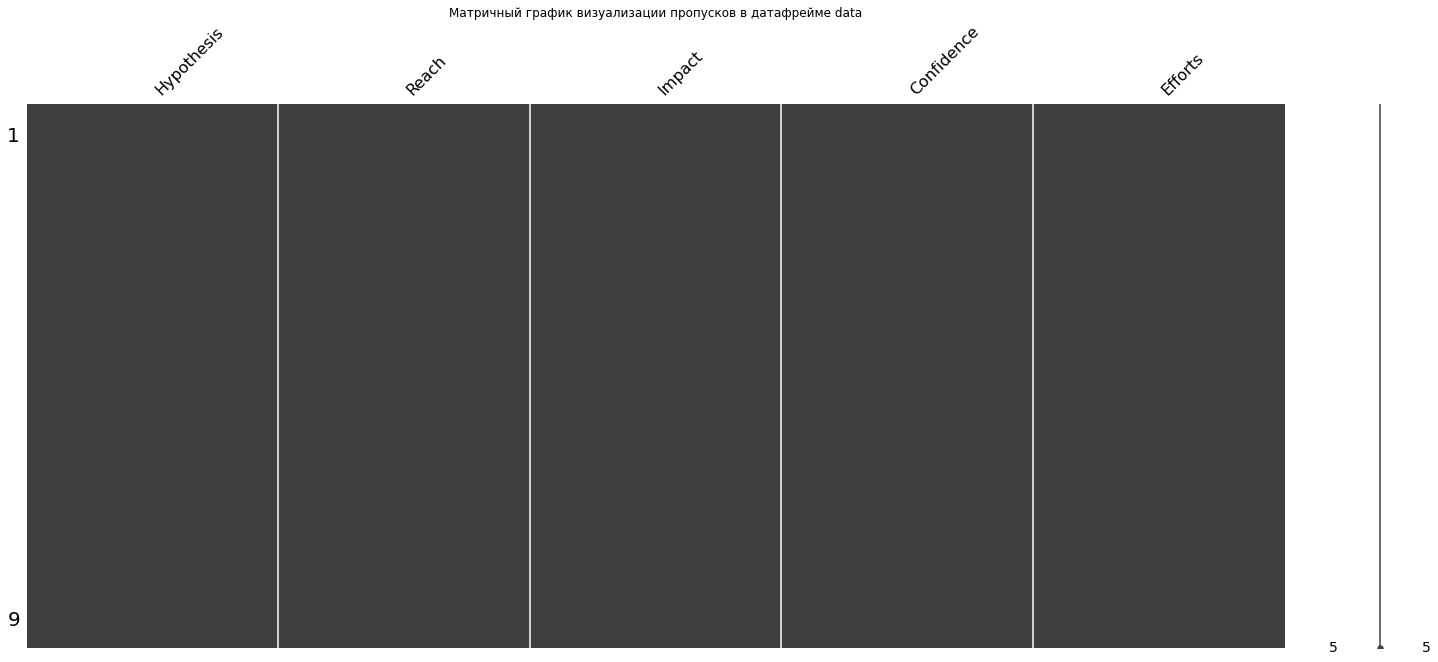

In [8]:
msno.matrix(data)
plt.title('Матричный график визуализации пропусков в датафрейме data')
plt.show()
#убедились, что в датафрейме data отсутствуют пропуски

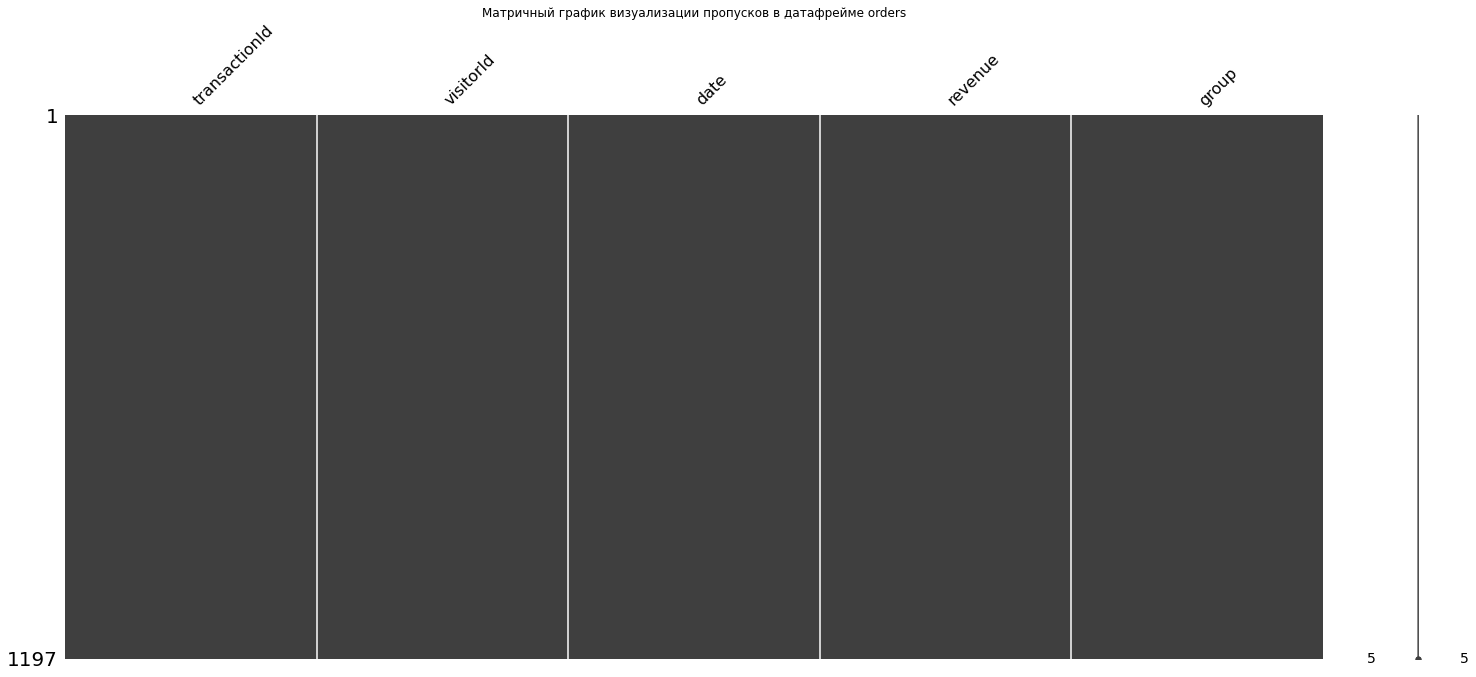

In [9]:
msno.matrix(orders)
plt.title('Матричный график визуализации пропусков в датафрейме orders')
plt.show()
#убедились, что в датафрейме orders отсутствуют пропуски

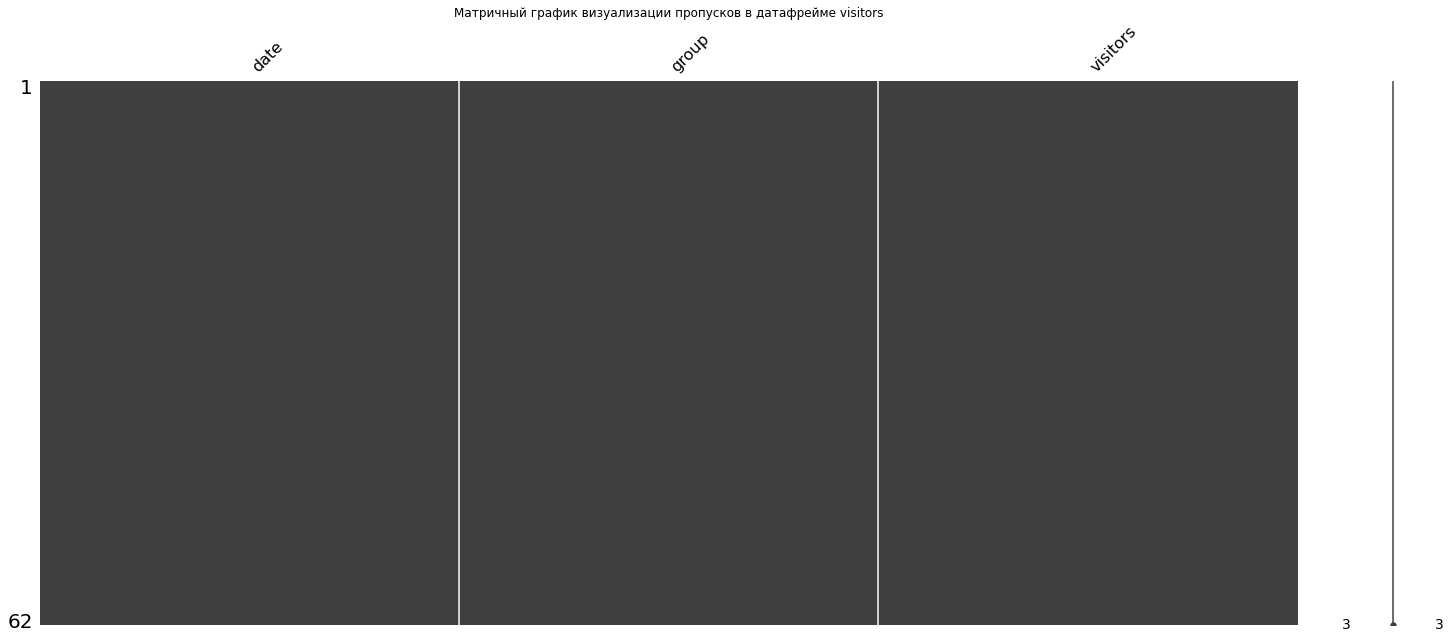

In [10]:
msno.matrix(visitors)
plt.title('Матричный график визуализации пропусков в датафрейме visitors')
plt.show()
#убедились, что в датафрейме visitors отсутствуют пропуски

  Матричный график, который использовался в рамках библиотеки missingno является отличным инструментом для визуализации пропусков. Суть данного метода заключается в обеспечении цветной заливки для каждого столбца. Таким образом, когда данные присутствуют, график затеняется серым (или выбранным вами цветом), а когда они отсутствуют, график отображается белым цветом. Данный способ удобен тем, что можно визуально определить как сами пропуски, так и их долю от всех данных.

В качестве альтернативного подхода к определению пропусков, применим конструкцию isna().sum().

In [11]:
data.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
data.duplicated().sum()
#убедились, что в датафрейме data отсутствуют дубликаты

0

In [15]:
orders.duplicated().sum()
#убедились, что в датафрейме orders отсутствуют дубликаты

0

In [16]:
visitors.duplicated().sum()
#убедились, что в датафрейме visitors отсутствуют дубликаты

0

<b> В результате предобработки была проведена проверка на дубликаты и пропуски - их не оказалось в исходных датафреймах.</b>

## Приоритизация гипотез

In [17]:
pd.set_option('display.max_colwidth', None)
#данная команда нужна для полного отображения строки
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [18]:
data['ICE'] = round(data['Impact'] * data['Confidence'] / data['Efforts'], 2)
data[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8,0,7; тогда как наименее перспективными будут гипотезы 5, 3 и 4.

In [19]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data['RICE']
#data[['Hypothesis', 'RICE', 'Reach']].sort_values(by = 'RICE', ascending = False)

0     40.0
1      4.0
2     56.0
3      9.0
4      3.0
5      4.0
6     40.0
7    112.0
8     16.2
Name: RICE, dtype: float64

Наиболее перспективными гипотезами по RICE являются: 7,2,0,6. Наименее перспективными - 1,5 и 4.

В ходе рассмотрения фреймворков ICE и RICE удалось выявить наиболее перспективные гипотезы, а также отбросить те гипотезы, которые не покажут должного результата. Поскольку RICE учитывает также  Reach (показывает, скольких пользователей затронет изменение, которое мы хотим внести), то нельзя не брать во внимание такой ценный параметр. Наиболее удачными для последующих тестов будут гипотезы под номерами 7,2 и 0.

## Анализ A/B теста.

Перед началом теста посмотрим количество участников в группах.

In [20]:
groupA = orders.query('group == "A"')
len(groupA)

557

In [21]:
groupB = orders.query('group == "B"')
len(groupB)

640

Количество людей по группам распределено неравномерно, но не столь критично. Можно приступать к работе.

In [22]:
orders.rename(columns = {'transactionId' : 'orderId', 'visitorId' : 'userId'}, inplace = True)
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [23]:
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


Поскольку групп сравнения только две, то в данном случае мы работаем с парным A/B тестом.

In [24]:
orders.groupby('userId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Заметим, что лишь 58 попали в обе группы одновременно. Поскольку эта доля от общего числа небольшая, можем их оставить.

### Построение графика кумулятивной выручки по группам.

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


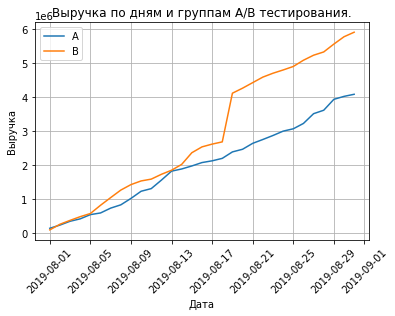

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Выручка по дням и группам A/B тестирования.')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построение графика кумулятивного среднего чека по группам.

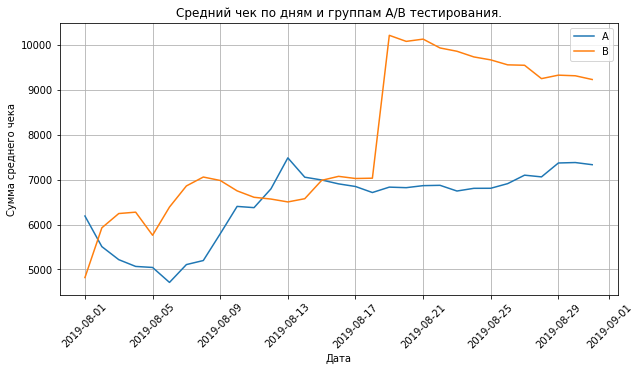

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.title('Средний чек по дням и группам A/B тестирования.')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.grid()
plt.legend()
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Исходя из графика, можно заметить, что средний чек для А группы сильно просел, однако выровнялся и постепенно шёл равномерно, чего нельзя сказать о группе B, где наблюдается резкий всплеск суммы среднего чека - за пару дней он вырос на 30%, затем плавно опускался вниз. Вероятно, всплеск связан с появлением крупных заказов, которые отразились на среднем чеке.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

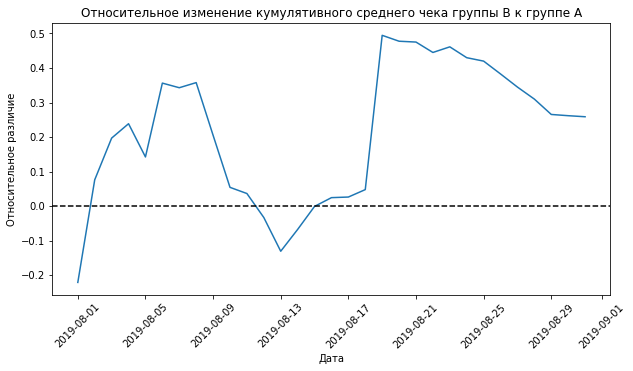

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное различие')
plt.rcParams["figure.figsize"]=10, 5
plt.show()

По графику заметим, что группа B практически всегда преваливаровала над группой А, за исключением первых дней теста и небольшой "просадки" в середине. Можно предположить, что причиной таких различий являются крупные заказы.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

Кумулятивное среднее количества заказов на посетителя - есть кумулятивное среднее

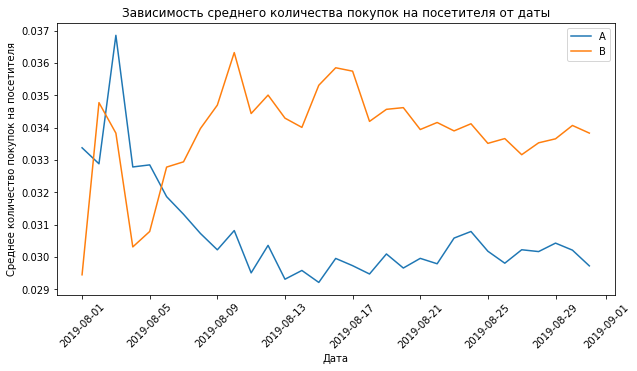

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation = 45)
plt.title('Зависимость среднего количества покупок на посетителя от даты')
plt.xlabel('Дата')
plt.ylabel('Среднее количество покупок на посетителя')
plt.legend()
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Заметим, что среднее количество покупок на посетителя у группы А после первой недели была стабильно больше, тогда как посетители из группы B показали значительный взлёт по данной метрике, затем эта разница постепенно уменьшалась и находилась в районе 0.05 на протяжении заключительных 10 дней теста.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

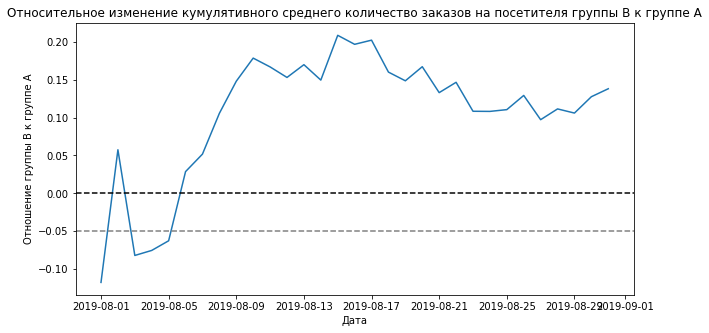

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количество заказов на посетителя группы B к группе A')
plt.ylabel('Отношение группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Заметим, что в начале теста группа B вырвалась вперед, затем произошёл непродолжительный спад, после которого наблюдается резкий взлёт, который уже не опускался ниже относительного нуля. В среднем, метрика группы B на 10-15% выше, чем у группы A. Однако отношение метрики ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Построение точечного графика количества заказов по пользователям.

In [31]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

#как видно из таблицы, есть пользователи, которые совершили более 5 заказов - это значительно больше того, 
#что совершает "рядовой" пользователь.

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


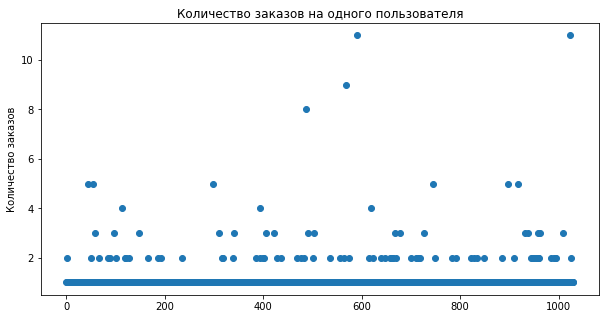

In [32]:
#построим точечную диаграмму числа заказов на одного пользователя.
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Как мы видим из точечной диаграммы, довольно много пользователей имеют 1-2 заказа, однако есть и пользователи с 3-мя и более заказами, в связи с этим, не совсем ясно, считать ли пользователей аномальными или нет.

### Расчёт 95-го и 99-го перцентиля количества заказов на пользователя.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей совершали больше 2 заказов, значит, пользователей с 3-мя и более заказами можно считать аномальными. Разумно выбрать пользователей с 3-мя заказами за нижнюю границу для определения аномальной активности.

### Построение точечного графика стоимостей заказов.

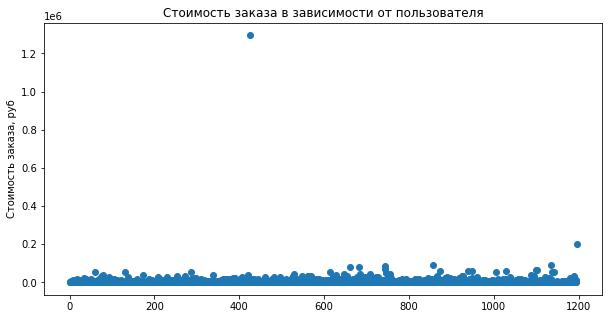

In [34]:
#оценим стоимости заказов у пользователей с помощью точечного графика
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказа в зависимости от пользователя')
plt.ylabel('Стоимость заказа, руб')
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Как мы видим из графика практически все заказы находятся в пределах 150000 рублей, лишь 2 заказа по своей высокой стоимости сильно выбиваются из общей картины.

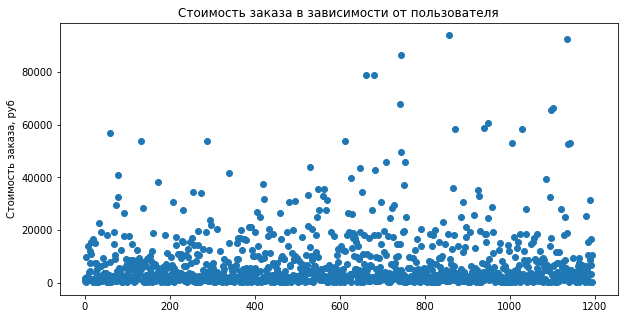

In [35]:
norm_revenue = orders[orders['revenue']< 150000]
x_values = pd.Series(range(0,len(norm_revenue['revenue'])))
plt.scatter(x_values, norm_revenue['revenue']) 
plt.title('Стоимость заказа в зависимости от пользователя')
plt.ylabel('Стоимость заказа, руб')
plt.rcParams["figure.figsize"]=10, 5
plt.show()

Заметим, что большинство неаномальных заказов находится на уровне до 20000 рублей. Кроме того, заказов стоимостью более 80000 рублей наблюдается только 3.

### Расчёт 95-го и 99-го перцентиля стоимости заказов.

In [36]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Заметим, что не более 5% заказов по своей стоимости превышают 28000 рублей, значит, именно сумму в 28000 рублей можно считать нижней границей аномальности.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Поскольку в предыдущих заданиях нам удалось оценить результаты A/B-теста визуально и выяснить, что в данных, скорее всего, есть выбросы, а также увидеть выбросы и найти границу для их определения, то следующим этапом работы будет формулировка соответствующих гипотез и расчёт статистической значимости по "сырым" и "очищенным" данным.

Сформулируем гипотезы. <br>
Нулевая: различий в среднем количестве заказов между группами нет. <br>
Альтернативная: различия в среднем между группами есть. <br>

Тест, по которому проводится проверка гипотезы, является критерий Манна-Уитни. Данный критерий был выбран в связи с тем, что в в данных есть большие (по сравнению с нормальным распределением) выбросы, которые могут искажать итоговый результат. Суть данного подхода заключается в ранжировании данных 2-ух выборок(в данном случае 2-ух групп, взятых на определённом временном промежутке) и сравнении разниц между рангами, которые укажут на то, достоверны ли различия или нет. Этот критерий будет актуален потому, что он не учитывает сами значения, ведь работает только с рангами - это удобно, когда данные распределены ненормально(то есть имеют место выбросы).

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

visitors = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(visitors.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Названия столбцов данных: 
 - date — дата;
 - ordersPerDateA — количество заказов в выбранную дату в группе A;
 - revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 - ordersPerDateB — количество заказов в выбранную дату в группе B;
 - revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 - ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 - revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 - ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 - visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 - visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 - visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 - visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

<div class="alert alert-block alert-info">
<b> Исправил. </b>
</div>

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница между сравниваемыми величинами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 


p-value: 0.017
Относительная разница между сравниваемыми величинами: 0.138


Вывод: По «сырым» данным различий в среднем числе заказов групп A и B нет. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе отвергаем - отличия всё же есть. Однако относительный проигрыш группы B равен 13.8% — второе число в выводе.


### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. <br>
Нулевая гипотеза: различий в среднем чеке между группами нет. <br>
Альтернативная гипотеза: различия в среднем чеке между группами есть. <br>


In [39]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительная разница между сравниваемыми величинами: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Также стоит отметить, что средний чек группы B значительно выше среднего чека группы A.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Напомним, что найденные выше 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублей соответственно. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [40]:
x = 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(x, 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(x, 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64
74


Всего 74 аномальных пользователя.

In [41]:
#Вычислим отношение количества аномальных пользователей к общем количеству пользователей 
unique_users = orders['userId'].nunique()
ratio_abnormal = abnormalUsers.shape[0] / unique_users
print(round(ratio_abnormal * 100, 2), '%')

7.18 %


7,18% пользователей оказались аномальными.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [43]:
#применим статистический критерий Манна-Уитни к полученным выборкам.
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между сравниваемыми величинами: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013
Относительная разница между сравниваемыми величинами: 0.173


Результаты по среднему количеству заказов практически не изменились. Разница между сегментами увеличилась на 3.5%

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [44]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница между сравниваемыми величинами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.738
Относительная разница между сравниваемыми величинами: -0.020


P-value немного увеличился, но и разница между сегментами сократилась с 26% до 2%.

### Подведение  кратких итогов

Выводы, которые можно сделать исходя из теста по имеющимся данным: <br>
 - Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий; 
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; 
 - График различия среднего количества заказов между группами сообщает, что результаты группы B лучше, чем у группы A в среднем на 10-15%, кроме того, наблюдается тенденция к дальнейшему росту;
 - График различия среднего чека говорит о том, что результаты группы B в среднем превалируют над группой  A день и сейчас почти на 20-25% лучше, однако после резкого взлета наблюдается постепенный спад.
 
 Результат: остановить тест, признать тест успешным, сегмент B лучше сегмента A по обеим метрикам.

## Общий вывод

В ходе работы были выполнены следующие действия: 
 1. Проведена предобработка данных: проверили исходный датафрейм на дубликаты и пропуски, а также привели столбцы с датой и временем в соответствующий тип.
 2. Из числа исходных гипотез, данных для анализа, выбрали наиболее перспективные по фреймворкам ICE и RICE. Составили топ-3 наиболее значимых:
 - <b>7</b>	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;	
 - <b>2</b>	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;	
 - <b>0</b>	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.	
 3. Провели A/B тестирование, в ходе которого удалось выяснить, что сегмент B лучше сегмента А, поскольку статистически значимого различия между группами по "сырым" и данным после фильтрации не наблюдается. По 2-ум ключевым метрикам группа B находится выше. <br>
 В процессе работы разделение трафика было равномерным, кроме того, учитывалась статистическая значимость и был проведен анализ аномалий.